In [4]:
import http.client
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
import seaborn as sns

In [5]:
import http.client

conn = http.client.HTTPSConnection("coingecko.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "063ea1c81cmsh511c1e56374c14dp148a9fjsn29e3fe6cab8a",
    'x-rapidapi-host': "coingecko.p.rapidapi.com"
    }

conn.request("GET", "/coins/bitcoin/market_chart?vs_currency=usd&days=8", headers=headers)

res = conn.getresponse()
data = res.read()


In [6]:
crypto = json.loads(data)

In [7]:
# Plotting value of bitcoin value for 8 days in an hourly interval.
price = np.asarray(crypto['prices'])
day_1 = price[:24,[1]]
day_2 = price[24:48,[1]]
day_3 = price[48:72,[1]]
day_4 = price[72:96,[1]]
day_5 = price[96:120,[1]]
day_6 = price[120:144,[1]]
day_7 = price[144:168,[1]]
day_8 = price[168:,[1]]

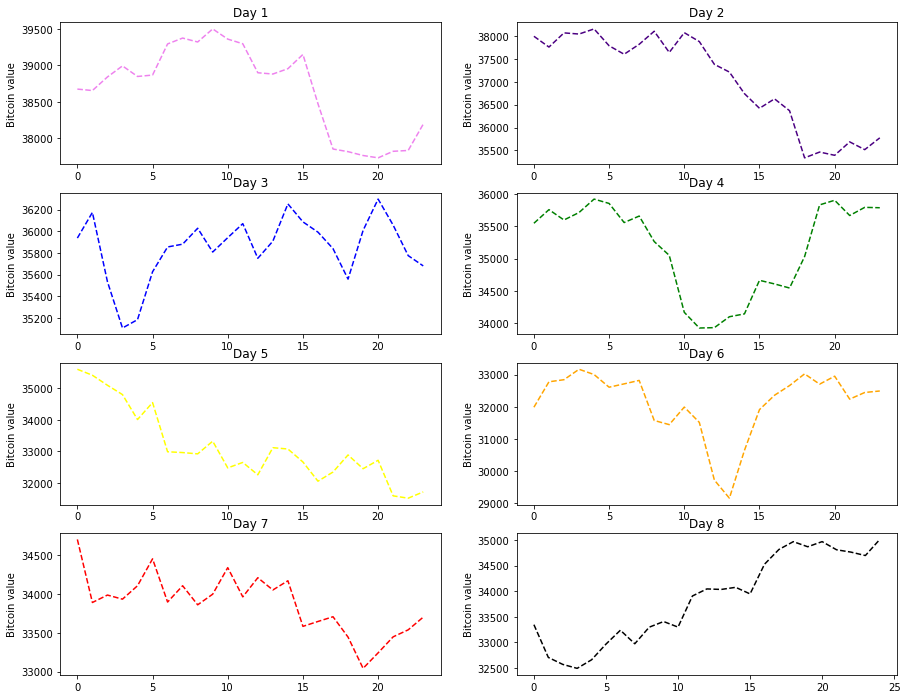

In [8]:
f,ax = plt.subplots(4,2,figsize = (15,12))
ax[0,0].set_title('Day 1')
ax[0,1].set_title('Day 2')
ax[1,0].set_title('Day 3')
ax[1,1].set_title('Day 4')
ax[2,0].set_title('Day 5')
ax[2,1].set_title('Day 6')
ax[3,0].set_title('Day 7')
ax[3,1].set_title('Day 8')
ax[0,0].plot(day_1, linestyle = '--',color = 'violet')
ax[0,1].plot(day_2, linestyle = '--',color = 'indigo')
ax[1,0].plot(day_3, linestyle = '--',color = 'blue')
ax[1,1].plot(day_4, linestyle = '--',color = 'g')
ax[2,0].plot(day_5, linestyle = '--',color = 'yellow')
ax[2,1].plot(day_6, linestyle = '--',color = 'orange')
ax[3,0].plot(day_7, linestyle = '--',color = 'r')
ax[3,1].plot(day_8, linestyle = '--',color = 'black')
ax[0,0].set_ylabel('Bitcoin value')
ax[0,1].set_ylabel('Bitcoin value')
ax[1,0].set_ylabel('Bitcoin value')
ax[1,1].set_ylabel('Bitcoin value')
ax[2,0].set_ylabel('Bitcoin value')
ax[2,1].set_ylabel('Bitcoin value')
ax[3,0].set_ylabel('Bitcoin value')
ax[3,1].set_ylabel('Bitcoin value')
plt.show()
f.savefig('Plot1.png')

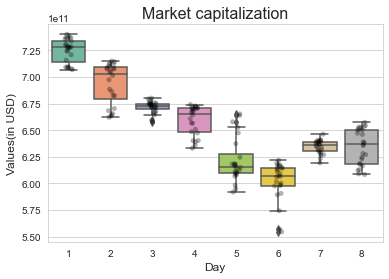

In [9]:
market_caps = np.asarray(crypto['market_caps'])
day_1_mc = market_caps[:24,[1]]
day_2_mc = market_caps[24:48,[1]]
day_3_mc = market_caps[48:72,[1]]
day_4_mc = market_caps[72:96,[1]]
day_5_mc = market_caps[96:120,[1]]
day_6_mc = market_caps[120:144,[1]]
day_7_mc = market_caps[144:168,[1]]
day_8_mc = market_caps[168:,[1]]
marketdata=[day_1_mc,day_2_mc,day_3_mc,day_4_mc,day_5_mc,day_6_mc,day_7_mc,day_8_mc]
sns.set_style("whitegrid")
colors=[]
boxplot=sns.boxplot(data=marketdata,palette='Set2')
boxplot.axes.set_title("Market capitalization", fontsize=16)
boxplot = sns.stripplot(data=marketdata, marker="o", alpha=0.3, color="black")
boxplot.set_xlabel("Day", fontsize=12)
boxplot.set_ylabel("Values(in USD)", fontsize=12)
boxplot.set_xticklabels(['1','2','3','4','5','6','7','8'])
fig = boxplot.get_figure()
fig.savefig('Plot2.png')

In [10]:
# Plotting Top 2 to 10 rank currencies, Market capital at a given instance of time

In [11]:
import http.client

conn = http.client.HTTPSConnection("coingecko.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "063ea1c81cmsh511c1e56374c14dp148a9fjsn29e3fe6cab8a",
    'x-rapidapi-host': "coingecko.p.rapidapi.com"
    }

conn.request("GET", "/coins/markets?vs_currency=usd&page=1&per_page=10&order=market_cap_desc", headers=headers)

res = conn.getresponse()
data = res.read()


In [12]:
crypto_2 = json.loads(data)

In [13]:
a = crypto_2[1]
b = crypto_2[2]
c = crypto_2[3]
d = crypto_2[4]
e = crypto_2[5]
f = crypto_2[6]
g = crypto_2[7]
h = crypto_2[8]
i = crypto_2[9]

In [14]:
currency_name1 =[a['id'],b['id'],c['id'],d['id'],e['id'],f['id'],g['id'],h['id'],i['id']]
market_cap =[a['market_cap'],b['market_cap'],c['market_cap'],d['market_cap'],e['market_cap'],f['market_cap'],g['market_cap'],h['market_cap'],i['market_cap']]

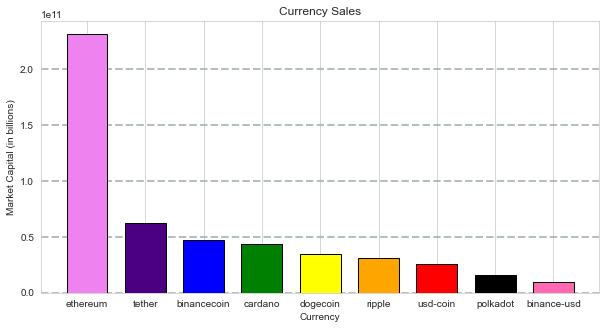

In [15]:
plt.figure(figsize=(10, 5))
plt.bar(range(0,9),market_cap,color=['violet','indigo','blue','green','yellow','orange','red','black','hotpink'],edgecolor ='black',tick_label = currency_name1,width=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel('Currency')
plt.ylabel('Market Capital (in billions)')
plt.title('Currency Sales')
plt.savefig('Plot3.png')

In [16]:
high_24h_value =[a['high_24h'],b['high_24h'],c['high_24h'],d['high_24h'],e['high_24h'],f['high_24h'],g['high_24h'],h['high_24h'],i['high_24h']]
high_24h_value_data = np.asarray(high_24h_value)
current_price = [a['current_price'],b['current_price'],c['current_price'],d['current_price'],e['current_price'],f['current_price'],g['current_price'],h['current_price'],i['current_price']]
current_price_data = np.asarray(current_price)
high_24h = (high_24h_value_data - current_price_data)

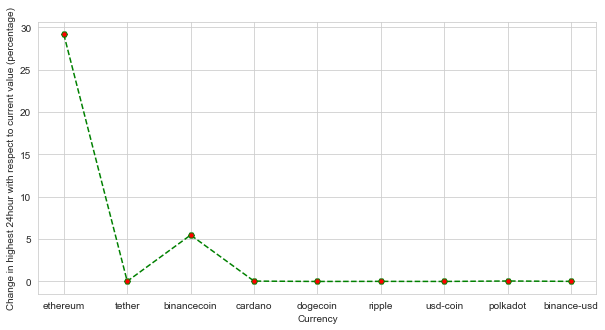

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(high_24h, 'H-',linestyle = '--' , color = 'green', mfc = 'red')
plt.xlabel('Currency')
plt.xticks(np.arange(9),currency_name1)
plt.ylabel('Change in highest 24hour with respect to current value (percentage)')
plt.savefig('Plot4.png')